In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = pd.read_csv("alldata.csv")

In [3]:
df.head()

,A,B,C,D,E,F,G,H,I,J,RESULT
0,0,1,0,1,7,13000,0,10,1,34,0
1,1,0,0,0,7,19000,0,1,1,828,0
2,0,0,0,1,7,0,0,9,1,259,1
3,0,0,1,1,3,0,0,5,1,43259,0
4,0,0,0,1,7,10000,0,4,1,47,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29755 entries, 0 to 29754
Data columns (total 11 columns):
A         29755 non-null int64
B         29755 non-null int64
C         29755 non-null int64
D         29755 non-null int64
E         29755 non-null int64
F         29755 non-null int64
G         29755 non-null int64
H         29755 non-null int64
I         29755 non-null int64
J         29755 non-null int64
RESULT    29755 non-null int64
dtypes: int64(11)
memory usage: 2.5 MB


In [5]:
import sklearn.linear_model as sklin


In [6]:
model = sklin.LogisticRegression()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('RESULT',axis=1), df['RESULT'], test_size=0.33, random_state=42)

In [9]:
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
pred = model.predict(X_test)

In [11]:
np.mean(pred != y_test)

0.02525458248472505

In [12]:
import sklearn.metrics as skmet

In [13]:
skmet.confusion_matrix(y_test,pred)

array([[9572,    0],
       [ 248,    0]], dtype=int64)

In [14]:
len(df.query("RESULT == 1"))

753

<AxesSubplot:xlabel='RESULT', ylabel='count'>

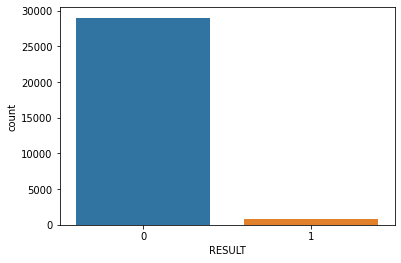

In [15]:
sb.countplot(df['RESULT'])

In [16]:
print(skmet.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9572
           1       0.00      0.00      0.00       248

    accuracy                           0.97      9820
   macro avg       0.49      0.50      0.49      9820
weighted avg       0.95      0.97      0.96      9820



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
df_train = pd.concat([X_train, y_train], axis=1)

In [18]:
df2 = df_train[df_train['RESULT'] == 0]

In [19]:
df2[1:4]

,A,B,C,D,E,F,G,H,I,J,RESULT
22894,1,0,0,1,7,0,0,1,1,0,0
6490,0,0,0,1,3,0,0,1,0,43260,0
11361,0,0,1,1,7,0,0,12,1,43260,0


In [20]:
df3 = df_train[df_train['RESULT'] == 1]

In [21]:
df3.shape

(505, 11)

In [22]:
df4 = pd.concat([df2[:500],  df3,     df2[1001:1500],     df3])
df4.shape

(2009, 11)

In [23]:
# X_train, X_test, y_train, y_test = train_test_split(df4.drop('RESULT',axis=1), df4['RESULT'], test_size=0.33, random_state=42)

In [24]:
X_train = df4.drop('RESULT',axis=1)
y_train = df4['RESULT']

In [25]:
sklin.LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
pred = model.predict(X_test)

In [27]:
np.mean(pred != y_test)

0.39470468431771893

In [28]:
skmet.confusion_matrix(y_test,pred)

array([[5812, 3760],
       [ 116,  132]], dtype=int64)

In [29]:
print(skmet.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.61      0.75      9572
           1       0.03      0.53      0.06       248

    accuracy                           0.61      9820
   macro avg       0.51      0.57      0.41      9820
weighted avg       0.96      0.61      0.73      9820



In [30]:
#!pip install -U imbalanced-learn

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('RESULT',axis=1), df['RESULT'], test_size=0.33, random_state=42)


In [32]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)

In [33]:
X_ros.shape

(38860, 10)

In [34]:
sum(y_ros==1)

19430

In [35]:
sum(y_ros==0)

19430

In [36]:
# X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.33, random_state=42)

In [37]:
model = sklin.LogisticRegression()
model.fit(X_ros,y_ros)

LogisticRegression()

In [38]:
pred = model.predict(X_test)

In [39]:
np.mean(pred != y_test)

0.3921588594704684

In [40]:
skmet.confusion_matrix(y_test,pred)

array([[5837, 3735],
       [ 116,  132]], dtype=int64)

In [41]:
print(skmet.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.61      0.75      9572
           1       0.03      0.53      0.06       248

    accuracy                           0.61      9820
   macro avg       0.51      0.57      0.41      9820
weighted avg       0.96      0.61      0.73      9820



In [42]:
#############################################################
# try SMOTE Algo (from imblean.oversampling)
#

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('RESULT',axis=1), df['RESULT'], test_size=0.33, random_state=42)


In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5)
X_smote, y_smote = smote.fit_sample(X_train, y_train)

In [45]:
sum(y_smote==1)

19430

In [46]:
model = sklin.LogisticRegression()
model.fit(X_smote,y_smote)

LogisticRegression()

In [47]:
pred = model.predict(X_test)

In [48]:
skmet.confusion_matrix(y_test,pred)

array([[5914, 3658],
       [ 121,  127]], dtype=int64)

In [49]:
print(skmet.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.62      0.76      9572
           1       0.03      0.51      0.06       248

    accuracy                           0.62      9820
   macro avg       0.51      0.56      0.41      9820
weighted avg       0.96      0.62      0.74      9820

